## Load DataSet

In [80]:
import numpy as np
import pandas as pd

import sklearn.preprocessing as preprocessing
import sklearn.model_selection as model_selection
import sklearn.linear_model as linear_model
import sklearn.tree as tree
import sklearn.ensemble as ensemble
import sklearn.svm as svm
import sklearn.neighbors as neighbors

from sklearn.ensemble import GradientBoostingRegressor 


import sklearn.grid_search as grid_search


import sklearn.pipeline as pipeline
import sklearn.metrics as metrics


import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns


%matplotlib inline

In [81]:
dataFrame = pd.read_csv("Bike-Sharing-Dataset\hour.csv")

In [82]:
dataFrame.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [83]:
dataFrame.shape

(17379, 17)

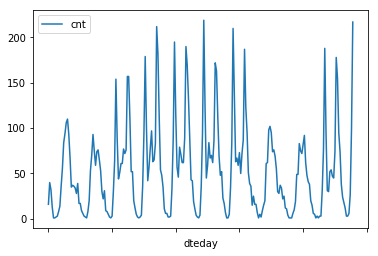

In [84]:
dataFrame[:24*10].plot(x= 'dteday',y='cnt')

In [85]:
dataFrame.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

## Data pre-processing

In [86]:
dataFrame.isnull().values.any()

False

### Univariate Analysis

In [87]:
dataFrame.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


- Instant can be removed as it doesn't make sense 
- Season needs to be converted to catagorical type
- Month needs to be converted to catagorical type
- hr needs to be converetd to catagorical type
- holiday is binary type
- Weekdays needs to be converted to catagorical type
- Casual and registered users adds to cnt and so does not make sense to add to the data frame amd can be removed

In [88]:
dataFrame.season = dataFrame.season.astype('category')

In [89]:
dataFrame.mnth = dataFrame.mnth.astype('category')

In [90]:
dataFrame.hr = dataFrame.hr.astype('category')

In [91]:
dataFrame.weekday = dataFrame.weekday.astype('category')

In [92]:
dataFrame.weathersit = dataFrame.weathersit.astype('category')

In [93]:
dataFrame.dtypes

instant          int64
dteday          object
season        category
yr               int64
mnth          category
hr            category
holiday          int64
weekday       category
workingday       int64
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

In [94]:
 dataFrame = dataFrame.drop(['instant','dteday','casual','registered'],axis=1)

In [95]:
dataFrame = pd.get_dummies(dataFrame)

In [96]:
dataFrame.shape

(17379, 59)

In [97]:
dataFrame.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_1', 'season_2', 'season_3', 'season_4', 'mnth_1',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1', 'hr_2',
       'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18',
       'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'weekday_0', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_1', 'weathersit_2', 'weathersit_3', 'weathersit_4'],
      dtype='object')

In [98]:
dataFrame.dtypes

yr                int64
holiday           int64
workingday        int64
temp            float64
atemp           float64
hum             float64
windspeed       float64
cnt               int64
season_1          uint8
season_2          uint8
season_3          uint8
season_4          uint8
mnth_1            uint8
mnth_2            uint8
mnth_3            uint8
mnth_4            uint8
mnth_5            uint8
mnth_6            uint8
mnth_7            uint8
mnth_8            uint8
mnth_9            uint8
mnth_10           uint8
mnth_11           uint8
mnth_12           uint8
hr_0              uint8
hr_1              uint8
hr_2              uint8
hr_3              uint8
hr_4              uint8
hr_5              uint8
hr_6              uint8
hr_7              uint8
hr_8              uint8
hr_9              uint8
hr_10             uint8
hr_11             uint8
hr_12             uint8
hr_13             uint8
hr_14             uint8
hr_15             uint8
hr_16             uint8
hr_17           

In [99]:
dataFrame.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000
atemp,17379.0,0.475775,0.171850,0.00,0.3333,0.4848,0.6212,1.0000
hum,17379.0,0.627229,0.192930,0.00,0.4800,0.6300,0.7800,1.0000
windspeed,17379.0,0.190098,0.122340,0.00,0.1045,0.1940,0.2537,0.8507
cnt,17379.0,189.463088,181.387599,1.00,40.0000,142.0000,281.0000,977.0000
season_1,17379.0,0.244088,0.429557,0.00,0.0000,0.0000,0.0000,1.0000
season_2,17379.0,0.253697,0.435139,0.00,0.0000,0.0000,1.0000,1.0000


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


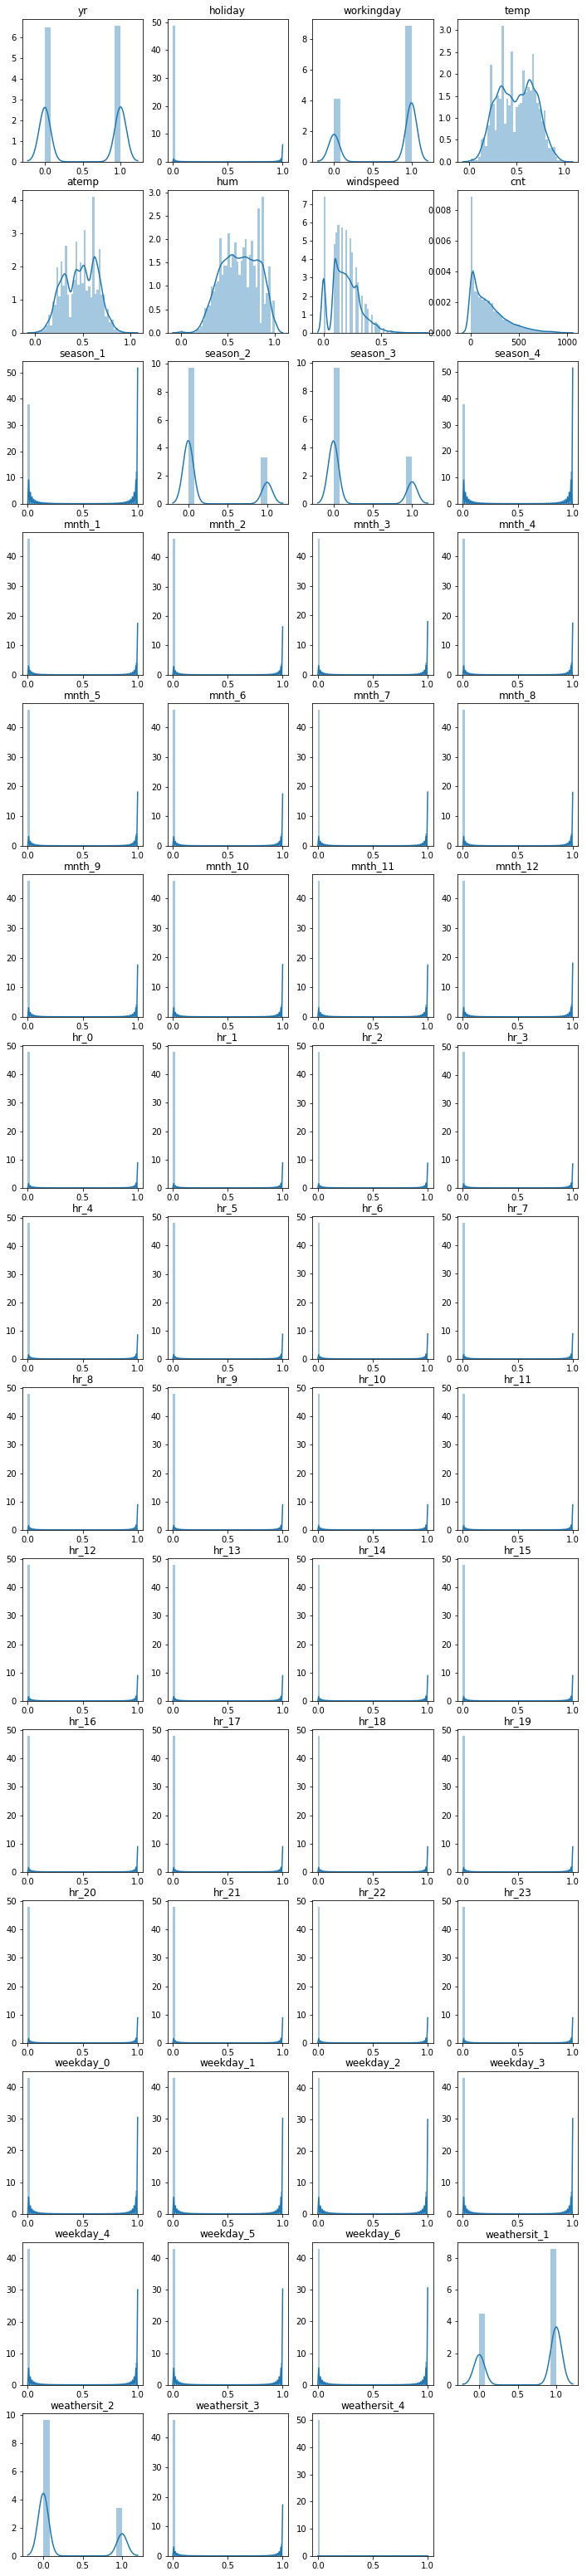

In [100]:
plt.figure(figsize=(12,15*4))
gs = gridspec.GridSpec(16,4)

for i,cn in enumerate(dataFrame.columns):
    ax = plt.subplot(gs[i])
    sns.distplot(dataFrame[cn])
    ax.set_xlabel('')
    ax.set_title(str(cn))
    

## Scale Data

In [101]:
Y_target = dataFrame.cnt
dataFrame = dataFrame.drop('cnt',axis=1)

In [102]:
MinmaxScaler = preprocessing.MinMaxScaler()

In [103]:
dataFrame = pd.DataFrame(MinmaxScaler.fit_transform(dataFrame[dataFrame.columns]),columns=dataFrame.columns)

In [104]:
dataFrame.head(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0.0,0.0,0.0,0.224490,0.2879,0.81,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.204082,0.2727,0.80,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.204082,0.2727,0.80,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.224490,0.2879,0.75,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.224490,0.2879,0.75,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [105]:
dataFrame.head(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0.0,0.0,0.0,0.224490,0.2879,0.81,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.204082,0.2727,0.80,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.204082,0.2727,0.80,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.224490,0.2879,0.75,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.224490,0.2879,0.75,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


### Bivariate Analysis

In [106]:
corr = dataFrame.corr()
x = corr.where(corr > 0.5).values.any()

In [107]:
x

True

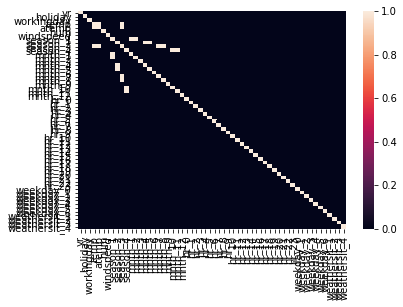

In [108]:
corr = dataFrame.corr()
sns.heatmap(corr >0.5, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

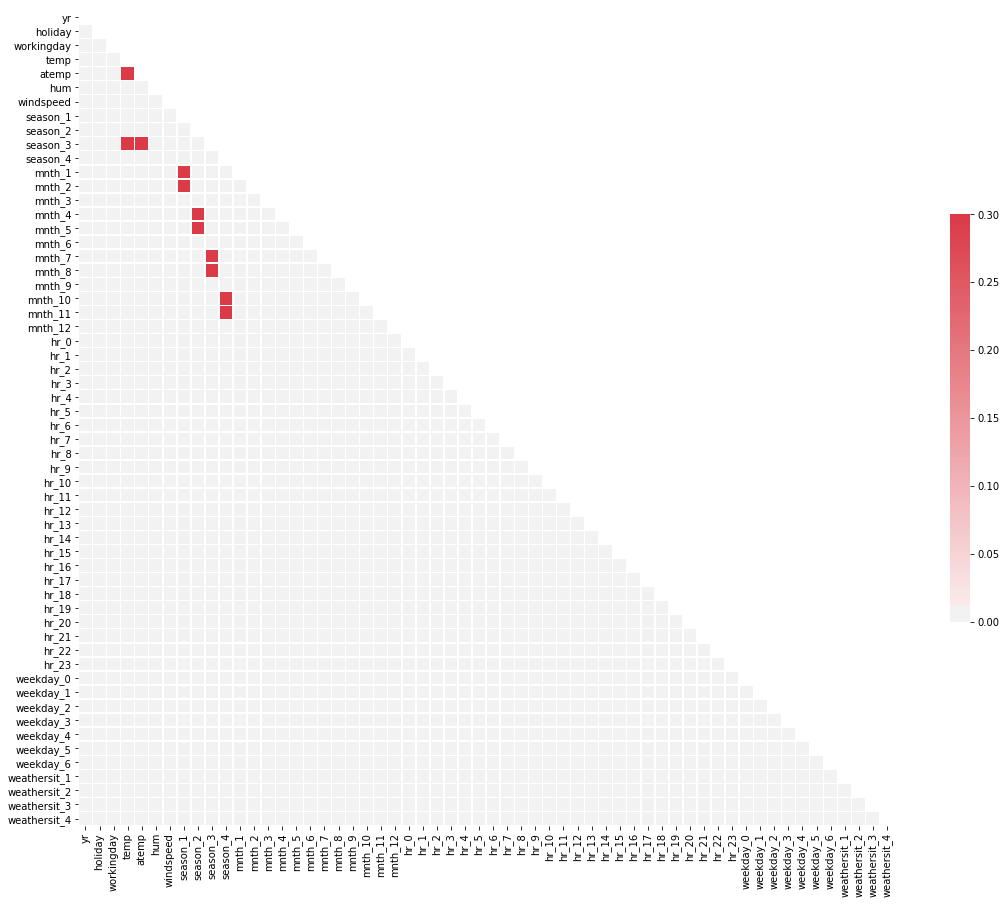

In [109]:

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr>0.5, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Clearly we can see strong co-relation between atemp and temp so we can drop any one of them

In [110]:
dataFrame = dataFrame.drop('atemp', axis=1)

In [111]:
dataFrame.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_1',
       'season_2', 'season_3', 'season_4', 'mnth_1', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
       'mnth_11', 'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5',
       'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13',
       'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21',
       'hr_22', 'hr_23', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_1', 'weathersit_2',
       'weathersit_3', 'weathersit_4'],
      dtype='object')

# Train, Test , Validate 

- split entire data into 80% train and 20% test
- split train data into 75% train and remaining 25% validation
- Final split is 60% train, 20% validate, 20% test

Note : In this solution we are performing grid search and cross validation so this split is not required

In [112]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(dataFrame,Y_target,test_size=0.3, random_state=42)

In [34]:
#X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train,y_train,test_size=0.25, random_state=42)

# Apply Grid search

In [35]:
model_1 = pipeline.Pipeline([
    ('poly',preprocessing.PolynomialFeatures()),
    ('linear_regression', linear_model.LinearRegression())
])

In [36]:
parameters = {}
parameters['poly__degree'] = [1,2]
parameters['poly__include_bias'] = [True]
parameters['linear_regression__normalize'] = [False,True]

In [37]:
grid_serach_model = grid_search.GridSearchCV(model_1,parameters, cv=5)

In [38]:
#grid_serach_model.get_params().keys()

In [39]:
grid_serach_model.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linear_regression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'poly__degree': [1, 2], 'poly__include_bias': [True], 'linear_regression__normalize': [False, True]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [40]:
# View best hyperparameters
print('Best Degree:', grid_serach_model.best_estimator_.get_params()['poly__degree'])
print('Best Bias:', grid_serach_model.best_estimator_.get_params()['poly__include_bias'])
print('Best Normalize:', grid_serach_model.best_estimator_.get_params()['linear_regression__normalize'])

Best Degree: 1
Best Bias: True
Best Normalize: False


In [41]:
print(grid_serach_model.best_score_)

0.6832263362948257


## Predict 

In [42]:
y_Predict = grid_serach_model.best_estimator_.predict(X_test)

In [43]:
accuracy = metrics.r2_score(y_test,y_Predict)
print(accuracy)

0.6807807519283194


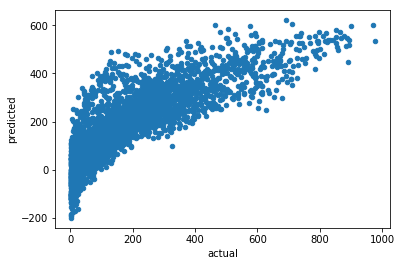

In [44]:
summary = pd.DataFrame({"actual": y_test
        , "predicted": y_Predict})
summary.plot.scatter(0, 1)

In [45]:
summary["error"] = summary.actual - summary.predicted

(array([-500., -400., -300., -200., -100.,    0.,  100.,  200.,  300.,
         400.,  500.]), <a list of 11 Text xticklabel objects>)

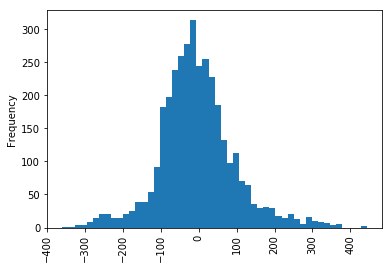

In [46]:
summary.error.plot.hist(bins = 50)
plt.xticks(rotation = 90)

In [47]:
# sum of squared error 
sse = np.sum(summary.error ** 2)
sse

35136133.77734375

# Decision Tree

In [44]:
model_2 = pipeline.Pipeline([
    ('poly',preprocessing.PolynomialFeatures()),
    ('DecisionTree', tree.DecisionTreeRegressor(criterion='mse'))
])

In [49]:
model_2.get_params().keys()

dict_keys(['memory', 'steps', 'poly', 'DecisionTree', 'poly__degree', 'poly__include_bias', 'poly__interaction_only', 'DecisionTree__criterion', 'DecisionTree__max_depth', 'DecisionTree__max_features', 'DecisionTree__max_leaf_nodes', 'DecisionTree__min_impurity_decrease', 'DecisionTree__min_impurity_split', 'DecisionTree__min_samples_leaf', 'DecisionTree__min_samples_split', 'DecisionTree__min_weight_fraction_leaf', 'DecisionTree__presort', 'DecisionTree__random_state', 'DecisionTree__splitter'])

In [50]:
DecisionTree_parameters = {}
DecisionTree_parameters['DecisionTree__max_depth'] = [35,45,55]
DecisionTree_parameters['DecisionTree__max_features'] = [30,40,50,55]
DecisionTree_parameters['poly__degree'] = [1,2]

In [51]:
DecisionTree_GridSearch = grid_search.GridSearchCV(model_2,DecisionTree_parameters,cv=5)

In [52]:
DecisionTree_GridSearch.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('DecisionTree', DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'DecisionTree__max_depth': [35, 45, 55], 'DecisionTree__max_features': [30, 40, 50, 55], 'poly__degree': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [53]:
# View best hyperparameters
print('Best Degree:', DecisionTree_GridSearch.best_estimator_.get_params()['poly__degree'])
print('Best Max Depth:', DecisionTree_GridSearch.best_estimator_.get_params()['DecisionTree__max_depth'])
print('Best DecisionTree__max_features:', DecisionTree_GridSearch.best_estimator_.get_params()['DecisionTree__max_features'])

Best Degree: 1
Best Max Depth: 35
Best DecisionTree__max_features: 50


In [54]:
print(DecisionTree_GridSearch.best_score_)

0.8441524725804183


In [55]:
y_decisionTree_predict = DecisionTree_GridSearch.best_estimator_.predict(X_test)

In [56]:
accuracy = metrics.r2_score(y_test,y_decisionTree_predict)
print(accuracy)

0.8485441307200875


In [57]:
DecisionTree_GridSearch.grid_scores_

[mean: 0.83563, std: 0.01282, params: {'DecisionTree__max_depth': 35, 'DecisionTree__max_features': 30, 'poly__degree': 1},
 mean: 0.71859, std: 0.02704, params: {'DecisionTree__max_depth': 35, 'DecisionTree__max_features': 30, 'poly__degree': 2},
 mean: 0.83553, std: 0.00892, params: {'DecisionTree__max_depth': 35, 'DecisionTree__max_features': 40, 'poly__degree': 1},
 mean: 0.73616, std: 0.02674, params: {'DecisionTree__max_depth': 35, 'DecisionTree__max_features': 40, 'poly__degree': 2},
 mean: 0.84415, std: 0.01174, params: {'DecisionTree__max_depth': 35, 'DecisionTree__max_features': 50, 'poly__degree': 1},
 mean: 0.75711, std: 0.01641, params: {'DecisionTree__max_depth': 35, 'DecisionTree__max_features': 50, 'poly__degree': 2},
 mean: 0.84051, std: 0.01291, params: {'DecisionTree__max_depth': 35, 'DecisionTree__max_features': 55, 'poly__degree': 1},
 mean: 0.77204, std: 0.02703, params: {'DecisionTree__max_depth': 35, 'DecisionTree__max_features': 55, 'poly__degree': 2},
 mean: 0

## Random Forest

In [58]:
model_3 = pipeline.Pipeline([
    ('poly',preprocessing.PolynomialFeatures()),
    ('RandomForest', ensemble.RandomForestRegressor())
])


In [59]:
model_3.get_params().keys()

dict_keys(['memory', 'steps', 'poly', 'RandomForest', 'poly__degree', 'poly__include_bias', 'poly__interaction_only', 'RandomForest__bootstrap', 'RandomForest__criterion', 'RandomForest__max_depth', 'RandomForest__max_features', 'RandomForest__max_leaf_nodes', 'RandomForest__min_impurity_decrease', 'RandomForest__min_impurity_split', 'RandomForest__min_samples_leaf', 'RandomForest__min_samples_split', 'RandomForest__min_weight_fraction_leaf', 'RandomForest__n_estimators', 'RandomForest__n_jobs', 'RandomForest__oob_score', 'RandomForest__random_state', 'RandomForest__verbose', 'RandomForest__warm_start'])

In [60]:
RandomForest_params = {}
RandomForest_params['poly__degree'] = [1,2]
RandomForest_params['RandomForest__max_depth'] = [30,35]
RandomForest_params['RandomForest__max_features'] = [50,55]
RandomForest_params['RandomForest__n_estimators'] = [40,45,50]


In [61]:
Randomforest_gridsearch = grid_search.GridSearchCV(model_3,RandomForest_params,cv = 5)

In [62]:
Randomforest_gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('RandomForest', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease...imators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'poly__degree': [1, 2], 'RandomForest__max_depth': [30, 35], 'RandomForest__max_features': [50, 55], 'RandomForest__n_estimators': [40, 45, 50]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [63]:
Randomforest_gridsearch.best_params_

{'RandomForest__max_depth': 35,
 'RandomForest__max_features': 50,
 'RandomForest__n_estimators': 50,
 'poly__degree': 1}

In [64]:
Randomforest_gridsearch.best_score_

0.9198924661849444

In [65]:
y_randomForest_Predict = Randomforest_gridsearch.best_estimator_.predict(X_test)

In [66]:
accuracy_RandomForest = metrics.r2_score(y_test,y_randomForest_Predict)
print(accuracy_RandomForest)

0.9266871363983873


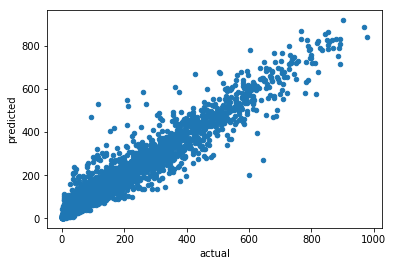

In [67]:
summary_randomForest = pd.DataFrame({"actual": y_test
        , "predicted": y_randomForest_Predict})
summary_randomForest.plot.scatter(0, 1)

(array([-500., -400., -300., -200., -100.,    0.,  100.,  200.,  300.,
         400.,  500.]), <a list of 11 Text xticklabel objects>)

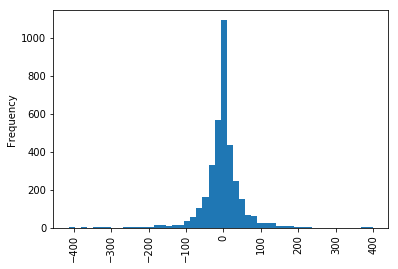

In [68]:
summary_randomForest["error"] = summary_randomForest.actual - summary_randomForest.predicted
summary_randomForest.error.plot.hist(bins = 50)
plt.xticks(rotation = 90)

## SVM

In [34]:
model_4 = pipeline.Pipeline([
    ('SVM', svm.SVR())
])

In [35]:
model_4.get_params().keys()

dict_keys(['memory', 'steps', 'SVM', 'SVM__C', 'SVM__cache_size', 'SVM__coef0', 'SVM__degree', 'SVM__epsilon', 'SVM__gamma', 'SVM__kernel', 'SVM__max_iter', 'SVM__shrinking', 'SVM__tol', 'SVM__verbose'])

In [83]:
svm_params = {}
svm_params['SVM__C'] = [1]
svm_params['SVM__gamma'] = [0.9,.95,1]
svm_params['SVM__degree'] = [3]
svm_params['SVM__kernel'] = ['poly']

In [84]:
svm_model = grid_search.GridSearchCV(model_4,svm_params,cv = 5)

In [85]:
svm_model.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('SVM', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'SVM__C': [1], 'SVM__gamma': [0.9, 0.95, 1], 'SVM__degree': [3], 'SVM__kernel': ['poly']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [86]:
svm_model.best_score_

0.9325774024978287

In [87]:
svm_model.best_params_

{'SVM__C': 1, 'SVM__degree': 3, 'SVM__gamma': 1, 'SVM__kernel': 'poly'}

In [88]:
y_SVM_Predict = svm_model.best_estimator_.predict(X_test)

In [89]:
accuracy_SVM = metrics.r2_score(y_test,y_SVM_Predict)
print(accuracy_SVM)

0.934703358867528


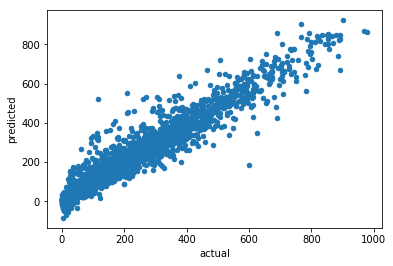

In [90]:
summary_SVM = pd.DataFrame({"actual": y_test
        , "predicted": y_SVM_Predict})
summary_SVM.plot.scatter(0, 1)

(array([-600., -400., -200.,    0.,  200.,  400.,  600.]),
 <a list of 7 Text xticklabel objects>)

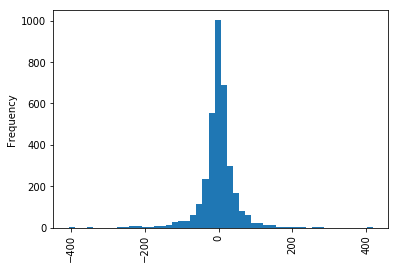

In [112]:
summary_SVM["error"] = summary_SVM.actual - summary_SVM.predicted
summary_SVM.error.plot.hist(bins = 50)
plt.xticks(rotation = 90)

# Adaboost

In [34]:
model_5 = pipeline.Pipeline([
    ('poly',preprocessing.PolynomialFeatures()),
    ('DecisionTree', tree.DecisionTreeRegressor())
])

In [35]:
adaboost_model = ensemble.AdaBoostRegressor(base_estimator=model_5)

In [36]:
adaboost_model.get_params().keys()

dict_keys(['base_estimator__memory', 'base_estimator__steps', 'base_estimator__poly', 'base_estimator__DecisionTree', 'base_estimator__poly__degree', 'base_estimator__poly__include_bias', 'base_estimator__poly__interaction_only', 'base_estimator__DecisionTree__criterion', 'base_estimator__DecisionTree__max_depth', 'base_estimator__DecisionTree__max_features', 'base_estimator__DecisionTree__max_leaf_nodes', 'base_estimator__DecisionTree__min_impurity_decrease', 'base_estimator__DecisionTree__min_impurity_split', 'base_estimator__DecisionTree__min_samples_leaf', 'base_estimator__DecisionTree__min_samples_split', 'base_estimator__DecisionTree__min_weight_fraction_leaf', 'base_estimator__DecisionTree__presort', 'base_estimator__DecisionTree__random_state', 'base_estimator__DecisionTree__splitter', 'base_estimator', 'learning_rate', 'loss', 'n_estimators', 'random_state'])

In [37]:
adaBoost_params = {}
adaBoost_params['base_estimator__DecisionTree__max_depth'] = [35]
adaBoost_params['base_estimator__DecisionTree__max_features'] = [50]

In [38]:
ada_gridSearch_model = grid_search.GridSearchCV(adaboost_model,param_grid=adaBoost_params,cv = 5)

In [39]:
ada_gridSearch_model.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostRegressor(base_estimator=Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('DecisionTree', DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decr...='best'))]),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'base_estimator__DecisionTree__max_depth': [35], 'base_estimator__DecisionTree__max_features': [50]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [40]:
ada_gridSearch_model.best_score_

0.9154256166821306

In [41]:
ada_gridSearch_model.best_params_


{'base_estimator__DecisionTree__max_depth': 35,
 'base_estimator__DecisionTree__max_features': 50}

In [42]:
y_pred_adaBoost = ada_gridSearch_model.best_estimator_.predict(X_test)

In [43]:
accuracy_AdaBoost = metrics.r2_score(y_test,y_pred_adaBoost)
print(accuracy_AdaBoost)

0.9295902328328708


# Bagging

In [44]:
model_6 = pipeline.Pipeline([
    ('poly',preprocessing.PolynomialFeatures()),
    ('Bagging', ensemble.BaggingRegressor())
])

In [56]:
param_Bagging = {}
param_Bagging['poly__degree']=[1,2,3]
param_Bagging['Bagging__n_estimators']=[20,30,50]
param_Bagging['Bagging__max_features']=[35,45,50]
param_Bagging['Bagging__bootstrap_features']=[True,False]

In [57]:
bagging_model = grid_search.GridSearchCV(model_6,param_grid=param_Bagging,cv = 5)

In [58]:
bagging_model.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__memory', 'estimator__steps', 'estimator__poly', 'estimator__Bagging', 'estimator__poly__degree', 'estimator__poly__include_bias', 'estimator__poly__interaction_only', 'estimator__Bagging__base_estimator', 'estimator__Bagging__bootstrap', 'estimator__Bagging__bootstrap_features', 'estimator__Bagging__max_features', 'estimator__Bagging__max_samples', 'estimator__Bagging__n_estimators', 'estimator__Bagging__n_jobs', 'estimator__Bagging__oob_score', 'estimator__Bagging__random_state', 'estimator__Bagging__verbose', 'estimator__Bagging__warm_start', 'estimator', 'fit_params', 'iid', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'scoring', 'verbose'])

In [59]:
bagging_model.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('Bagging', BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'poly__degree': [1, 2, 3], 'Bagging__n_estimators': [20, 30, 50], 'Bagging__max_features': [35, 45, 50], 'Bagging__bootstrap_features': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [60]:
bagging_model.best_score_

0.9034484811709658

In [61]:
bagging_model.best_params_

{'Bagging__bootstrap_features': False,
 'Bagging__max_features': 50,
 'Bagging__n_estimators': 50,
 'poly__degree': 1}

In [62]:
y_pred_bagging = bagging_model.best_estimator_.predict(X_test)

In [64]:
accuracy_bagging = metrics.r2_score(y_test,y_pred_bagging)

In [65]:
accuracy_bagging

0.9155841210630342

# GBM Boost

In [113]:
model_7 = GradientBoostingRegressor()

In [114]:
gbm_params = {}

In [139]:
gbm_params['learning_rate'] = [0.1]
gbm_params['max_depth'] = [10]
gbm_params['max_features'] = [10]
gbm_params['n_estimators'] = [200,400,500]

In [140]:
gbm_grid_search= grid_search.GridSearchCV(model_7,gbm_params,cv=5)

In [141]:
gbm_grid_search.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__alpha', 'estimator__criterion', 'estimator__init', 'estimator__learning_rate', 'estimator__loss', 'estimator__max_depth', 'estimator__max_features', 'estimator__max_leaf_nodes', 'estimator__min_impurity_decrease', 'estimator__min_impurity_split', 'estimator__min_samples_leaf', 'estimator__min_samples_split', 'estimator__min_weight_fraction_leaf', 'estimator__n_estimators', 'estimator__presort', 'estimator__random_state', 'estimator__subsample', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'fit_params', 'iid', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'scoring', 'verbose'])

In [142]:
gbm_grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.1], 'max_depth': [10], 'max_features': [10], 'n_estimators': [200, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [143]:
gbm_grid_search.best_score_

0.9314096458675152

In [144]:
gbm_grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 10,
 'max_features': 10,
 'n_estimators': 500}

In [145]:
y_pred_gbm = gbm_grid_search.best_estimator_.predict(X_test)

In [146]:
accuracy_gbm = metrics.r2_score(y_test,y_pred_gbm)
accuracy_gbm

0.939560444526962